### Installing the dependencies

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import umap
import tqdm as tqdm

/Users/akshatkumar/Documents/CH5650 - Molecular DS/Assignment 4_new/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Fetching data

In [ ]:
# Initialize lists to store data
atom_ids = []  # To store atom IDs
positions = []  # To store (xu, yu, zu)
velocities = []  # To store (vx, vy, vz)

# Read the .data file
with open('Polymer.data', 'r') as file:
    lines = file.readlines()

snapshots = []  # To store snapshots
# Parse the data
for i, line in enumerate(lines):
    if line.startswith("ITEM: ATOMS"):
        current_snapshot = []
        # The next 100 lines contain atom data
        for j in range(i + 1, i + 101):
            atom_data = lines[j].split()
            atom_id = int(atom_data[0])  # Extract atom ID
            xu, yu, zu = float(atom_data[3]), float(atom_data[4]), float(atom_data[5])  # Positions
            vx, vy, vz = float(atom_data[6]), float(atom_data[7]), float(atom_data[8])  # Velocities
            current_snapshot.append([atom_id, xu, yu, zu, vx, vy, vz])
        snapshots.append(current_snapshot)


### All helper functions

In [153]:
def get_positions(snapshot):
    return np.array([atom[1:4] for atom in snapshot])

def get_velocities(snapshot):
    return np.array([atom[4:7] for atom in snapshot])

def perform_kmeans(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data)
    return cluster_labels

def best_number_of_clusters(data, max_clusters=20):
    scores = []
    for i in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=42)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        scores.append(silhouette_avg)
        max_score = max(scores)
        best_n_clusters = scores.index(max_score) + 2
    return best_n_clusters

def best_number_of_clusters_with_plot(data, max_clusters=20):
    scores = []
    for i in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=42)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        scores.append(silhouette_avg)
        max_score = max(scores)
        best_n_clusters = scores.index(max_score) + 2

    plt.plot(range(2, max_clusters + 1), scores)
    plt.xlabel("Number of clusters")
    plt.ylabel("Silhouette score")
    plt.title("Silhouette score vs number of clusters")
    plt.scatter(best_n_clusters, max_score, color='red')
    plt.annotate(f'Highest\n({best_n_clusters}, {max_score:.2f})', xy=(best_n_clusters, max_score), xytext=(best_n_clusters+2, max_score-0.02),
             arrowprops=dict(facecolor='black', shrink=0.25))
    plt.show()

    labels = perform_kmeans(data, best_n_clusters)    
    return (best_n_clusters, labels)

    

In [105]:
def plot_cluster3d(data, labels, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, cmap='viridis')
    ax.set_title(title)
    ax.set_xlabel("UMAP 1")
    ax.set_ylabel("UMAP 2")
    ax.set_zlabel("UMAP 3")
    plt.grid(True)
    plt.show()

def plot_cluster2d(data, labels, title):
    plt.figure()
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
    plt.title(title)
    plt.xlabel("UMAP 1")
    plt.ylabel("UMAP 2")
    plt.grid(True)
    plt.show()

### Examples

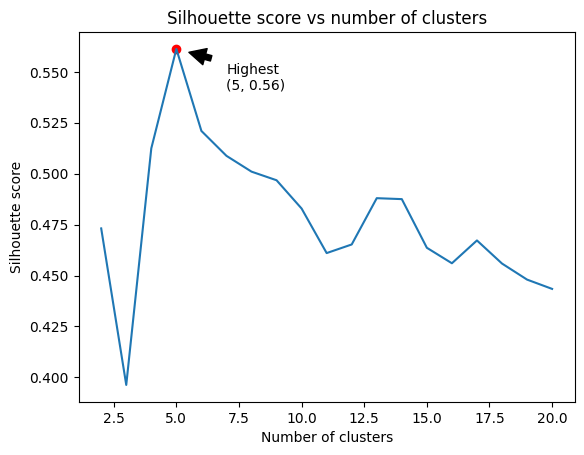

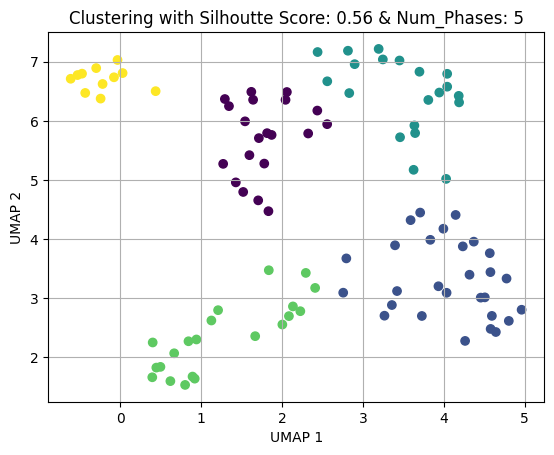

In [159]:
#example time step 1
positions = get_positions(snapshots[1])
velocities = get_velocities(snapshots[1])

data = np.hstack((positions, velocities))
reducer = umap.UMAP(n_components=2, random_state=42)
reduced_data = reducer.fit_transform(data)

N, labels = best_number_of_clusters_with_plot(reduced_data)
silhouette_avg = silhouette_score(reduced_data, labels)

plot_cluster2d(reduced_data, labels, "Clustering with Silhoutte Score: {:.2f} & Num_Phases: {:d}".format(silhouette_avg, N))

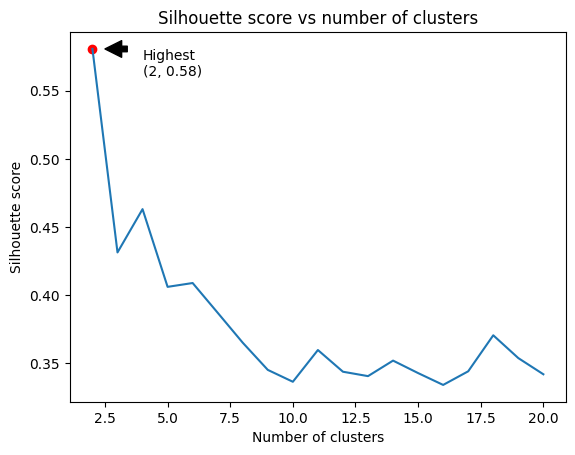

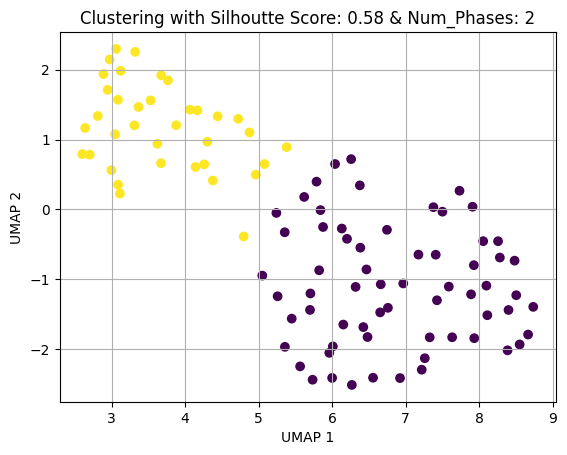

In [ ]:
#example time step 2
positions = get_positions(snapshots[8000])
velocities = get_velocities(snapshots[8000])

data = np.hstack((positions, velocities))
reducer = umap.UMAP(n_components=2, random_state=42)
reduced_data = reducer.fit_transform(data)

N, labels = best_number_of_clusters_with_plot(reduced_data)
silhouette_avg = silhouette_score(reduced_data, labels)

plot_cluster2d(reduced_data, labels, "Clustering with Silhoutte Score: {:.2f} & Num_Phases: {:d}".format(silhouette_avg, N))

### Cluster Analysis

In [127]:
import warnings
warnings.filterwarnings("ignore")
num_phases = []
for i in tqdm.tqdm(range(len(snapshots)), desc="Processing Snapshots"):
    positions = get_positions(snapshots[i])
    velocities = get_velocities(snapshots[i])

    data = np.hstack((positions, velocities))
    reducer = umap.UMAP(n_components=2, random_state=42)
    reduced_data = reducer.fit_transform(data)

    N = best_number_of_clusters(reduced_data, 6)
    num_phases.append(N)

print(num_phases)


Processing Snapshots: 100%|██████████| 12060/12060 [15:12<00:00, 13.21it/s]

[4, 5, 5, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 4, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 5, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 3, 3, 3, 2, 6, 2, 2, 2, 4, 2, 4, 4, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 4, 2, 2, 2, 2, 4, 3, 3, 2, 2, 3, 3, 3, 3, 5, 2, 5, 3, 3, 2, 4, 5, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 3, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 3, 3, 4, 5, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 2, 4, 2, 2, 2, 2, 2, 2, 3, 3, 2, 4, 3, 4, 4, 2, 3, 3, 4, 2, 2, 3, 2, 4, 4, 5, 2, 2, 2, 2, 2, 2, 2, 6, 2, 3, 2, 2, 2, 3, 2, 2, 4, 4, 3, 5, 

In [128]:
print(np.mean(num_phases), np.std(num_phases))

2.616915422885572 0.9567838112674294


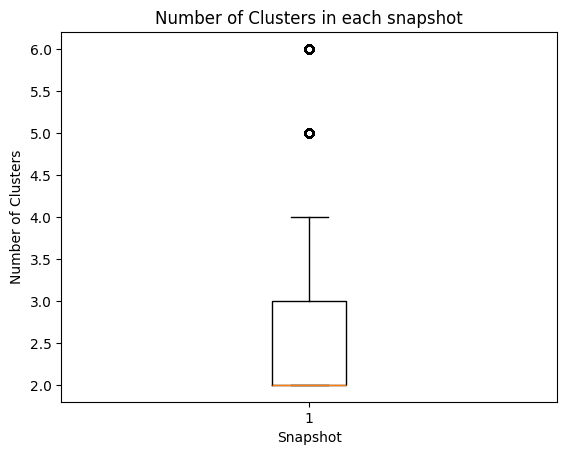

In [ ]:
x = np.arange(len(snapshots))
# plt.plot(x,num_phases, color='blue', alpha=0.7, linewidth=0.8)
# plt.scatter(x, num_phases, s=1, alpha=0.6, color='purple')
plt.boxplot(num_phases, vert=True)
plt.xlabel("Snapshot")
plt.ylabel("Number of Clusters")
plt.title("Number of Clusters in each snapshot")
plt.show()

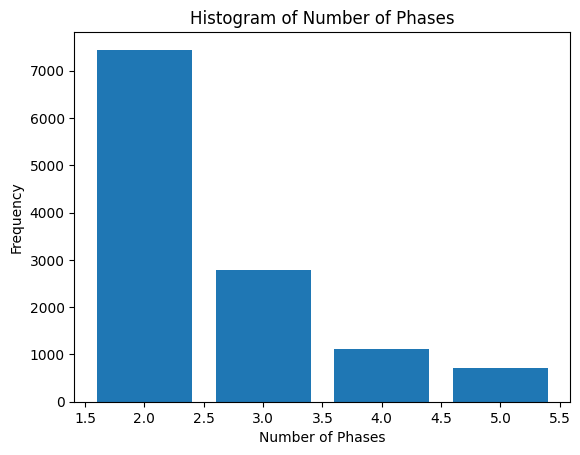

In [129]:
plt.hist(num_phases, bins=range(2, 7), align='left', rwidth=0.8)
plt.xlabel("Number of Phases")
plt.ylabel("Frequency")
plt.title("Histogram of Number of Phases")
plt.show()

### Over a period of the 10000 snapshots we can clearly see that there is a lot of variation in the number of clusters classified by the UMAP function. As per the histogram analysis and box plot analysis, it can be concluded that the total number of phases can be estimated to be around somewhere 3.

### Initially a close to when the simulation starts, we can see a higher number (5-6) of clusters being identified which then ultimately stabilises to a number around 2-3 and then at the end there are again some fluctuations towards a higher number (5-6)


#### I have added various helper functions that will help visualise the clusters along with relevant plotting functions that will enable the user to make an informed choice. I have used the UMAP function to perform a dimensionality reduction due to its capability to extract non-linear information from the data provided